# Baseline Performance

You will start with a model that's very effective at learning Cats vs Dogs without data augmentation. It's similar to the previous models that you have used. Note that there are four convolutional layers with 32, 64, 128 and 128 convolutions respectively. The code is basically the same from the previous lab so we won't go over the details step by step since you've already seen it before.

You will train only for 20 epochs to save time but feel free to increase this if you want.

In [1]:
% % writefile download.sh

#!/bin/bash
fileid = "$1"
filename = "$2"
html = `curl - c. / cookie - s - L
"https://drive.google.com/uc?export=download&id=${fileid}"
`
curl - Lb. / cookie
"https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" - o ${
    filename}

Writing download.sh


In [2]:
# Download the dataset
!bash download.sh 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9 cats_and_dogs_filtered.zip

Windows Subsystem for Linux has no installed distributions.

Distributions can be installed by visiting the Microsoft Store:

https://aka.ms/wslstore



In [3]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

# Assign training and validation set directories
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


def create_model():
    '''Creates a CNN with 4 convolutional layers'''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

    return model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50,  # 1000 images = batch_size * steps
    verbose=2)

Epoch 1/20
100/100 - 13s - loss: 0.6914 - accuracy: 0.5415 - val_loss: 0.6711 - val_accuracy: 0.5990 - 13s/epoch - 129ms/step
Epoch 2/20
100/100 - 4s - loss: 0.6585 - accuracy: 0.6175 - val_loss: 0.6792 - val_accuracy: 0.5190 - 4s/epoch - 40ms/step
Epoch 3/20
100/100 - 4s - loss: 0.6071 - accuracy: 0.6745 - val_loss: 0.5986 - val_accuracy: 0.6880 - 4s/epoch - 37ms/step
Epoch 4/20
100/100 - 4s - loss: 0.5719 - accuracy: 0.6925 - val_loss: 0.5875 - val_accuracy: 0.6800 - 4s/epoch - 37ms/step
Epoch 5/20
100/100 - 4s - loss: 0.5378 - accuracy: 0.7335 - val_loss: 0.5631 - val_accuracy: 0.7020 - 4s/epoch - 37ms/step
Epoch 6/20
100/100 - 4s - loss: 0.5145 - accuracy: 0.7570 - val_loss: 0.5553 - val_accuracy: 0.7210 - 4s/epoch - 36ms/step
Epoch 7/20
100/100 - 4s - loss: 0.4881 - accuracy: 0.7650 - val_loss: 0.5579 - val_accuracy: 0.7150 - 4s/epoch - 37ms/step
Epoch 8/20
100/100 - 4s - loss: 0.4614 - accuracy: 0.7825 - val_loss: 0.5429 - val_accuracy: 0.7350 - 4s/epoch - 36ms/step
Epoch 9/20
10

In [28]:
import matplotlib.pyplot as plt


def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

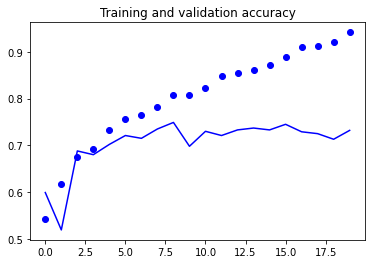

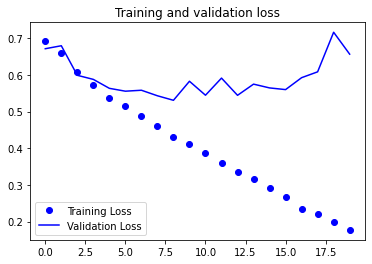

In [29]:
# Plot training results
plot_loss_acc(history)

From the results above, you'll see the training accuracy is more than 90%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't.

# Data augmentation

One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the ImageDataGenerator which you have been using to rescale the image. There are other properties on it that you can use to augment the image.

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
These are just a few of the options available. Let's quickly go over it:

rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of train_datagen has been updated to use the parameters described above.

In [30]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,  # 1000 images = batch_size * steps
    verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 10s - loss: 0.6924 - accuracy: 0.5115 - val_loss: 0.6883 - val_accuracy: 0.4990 - 10s/epoch - 103ms/step
Epoch 2/100
100/100 - 9s - loss: 0.6780 - accuracy: 0.5650 - val_loss: 0.6475 - val_accuracy: 0.6320 - 9s/epoch - 90ms/step
Epoch 3/100
100/100 - 9s - loss: 0.6655 - accuracy: 0.5940 - val_loss: 0.6308 - val_accuracy: 0.6460 - 9s/epoch - 91ms/step
Epoch 4/100
100/100 - 8s - loss: 0.6496 - accuracy: 0.6200 - val_loss: 0.6260 - val_accuracy: 0.6490 - 8s/epoch - 84ms/step
Epoch 5/100
100/100 - 8s - loss: 0.6313 - accuracy: 0.6260 - val_loss: 0.5881 - val_accuracy: 0.6840 - 8s/epoch - 80ms/step
Epoch 6/100
100/100 - 8s - loss: 0.6187 - accuracy: 0.6640 - val_loss: 0.5753 - val_accuracy: 0.6900 - 8s/epoch - 82ms/step
Epoch 7/100
100/100 - 8s - loss: 0.6015 - accuracy: 0.6615 - val_loss: 0.5656 - val_accuracy: 0.6880 - 8s/epoch - 83ms/step
Epoch 8/100
100/100 - 9s - loss: 0.5950 - acc

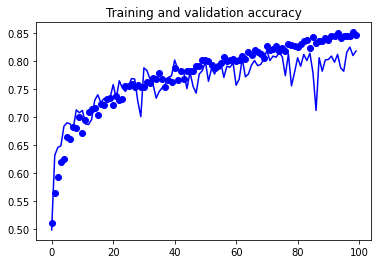

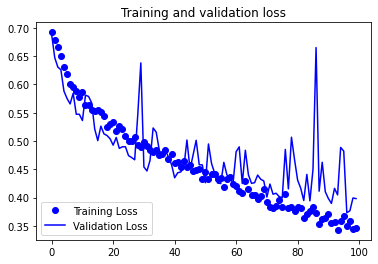

In [31]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

As you can see, the training accuracy has gone down compared to the baseline. This is expected because (as a result of data augmentation) there are more variety in the images so the model will need more runs to learn from them. The good thing is the validation accuracy is no longer stalling and is more in line with the training results. This means that the model is now performing better on unseen data.


In [34]:
# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Constant for epochs
EPOCHS = 20

# Train the model
history_with_augmentation = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8)

Epoch 1/20
8/8 [==============================] - 2s 144ms/step - loss: 0.6945 - accuracy: 0.4812 - val_loss: 0.6905 - val_accuracy: 0.5250
Epoch 2/20
8/8 [==============================] - 1s 109ms/step - loss: 0.6926 - accuracy: 0.4938 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 1s 113ms/step - loss: 0.6948 - accuracy: 0.4688 - val_loss: 0.6916 - val_accuracy: 0.4812
Epoch 4/20
8/8 [==============================] - 1s 116ms/step - loss: 0.6913 - accuracy: 0.5125 - val_loss: 0.6897 - val_accuracy: 0.5250
Epoch 5/20
8/8 [==============================] - 1s 117ms/step - loss: 0.6913 - accuracy: 0.5125 - val_loss: 0.6919 - val_accuracy: 0.4938
Epoch 6/20
8/8 [==============================] - 1s 124ms/step - loss: 0.6818 - accuracy: 0.5813 - val_loss: 0.6919 - val_accuracy: 0.5250
Epoch 7/20
8/8 [==============================] - 1s 122ms/step - loss: 0.7016 - accuracy: 0.4688 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 8/20
8/8 [====

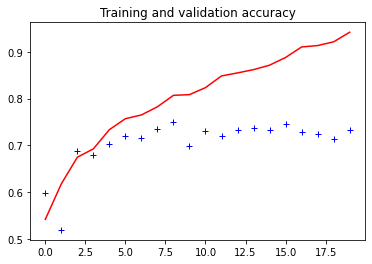

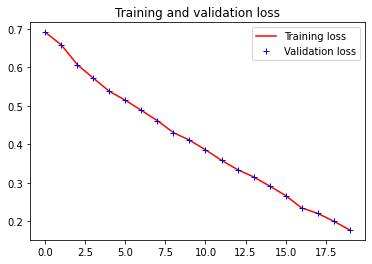

In [33]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b+', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, loss, 'b+', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


As you can see in the results, the preprocessing techniques used in augmenting the data did not help much in the results. The validation accuracy is fluctuating and not trending up like the training accuracy. This might be because the additional training data generated still do not represent the features in the validation data. For example, some human or horse poses in the validation set cannot be mimicked by the image processing techniques that ImageDataGenerator provides. It might also be that the background of the training images are also learned so the white background of the validation set is throwing the model off even with cropping. Try looking at the validation images in the tmp/validation-horse-or-human directory (note: if you are using Colab, you can use the file explorer on the left to explore the images) and see if you can augment the training images to match its characteristics. If this is not possible, then at this point you can consider other techniques and you will see that in next week's lessons.